In [1]:
# prep: import modules and get pwd
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass  # To get the password without showing the input
password = getpass.getpass()

········


In [2]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string)

In [3]:
#from the 1000 movies that I have I checked if that film was ever rented as I don't think is useful to check a film that was never rented.
never_rented = pd.read_sql_query('''SELECT f.title, r.rental_id 
FROM film f 
left JOIN film_category fc USING (film_id) 
left JOIN film_actor fa USING (film_id)
left JOIN inventory i USING (film_id)
left join rental r USING (inventory_id)
WHERE rental_id IS NULL
GROUP BY title;''', engine)
never_rented

,title,rental_id
0,ACADEMY DINOSAUR,None
1,ALICE FANTASIA,None
2,APOLLO TEEN,None
3,ARGONAUTS TOWN,None
4,ARK RIDGEMONT,None
5,ARSENIC INDEPENDENCE,None
6,BOONDOCK BALLROOM,None
7,BUTCH PANTHER,None
8,CATCH AMISTAD,None
9,CHINATOWN GLADIATOR,None


In [4]:
# I create my X
query = '''SELECT COUNT(r.rental_id) AS rental_count, f.title, f.film_id, fc.category_id, f.rating, f.special_features, f.replacement_cost, fa.actor_id
FROM rental r
JOIN inventory i USING (inventory_id)
JOIN film f USING (film_id)
JOIN film_category fc USING (film_id) 
left JOIN film_actor fa USING (film_id)
GROUP BY f.title;'''

df = pd.read_sql_query(query, engine)
print(df.shape)
#checking for nulls
df.isna().sum()
#3 actor_id will be 0.

(958, 8)


rental_count        0
title               0
film_id             0
category_id         0
rating              0
special_features    0
replacement_cost    0
actor_id            3
dtype: int64

In [5]:
#checking if it worth the try
df['actor_id'].unique()
#Uf! Actor ID are 138 alternatives
pd.crosstab(df['rental_count'], df['actor_id'])
#I can barely see but actor 94 has only 12 rents while actor 109 has 276!

actor_id,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,152.0,154.0,155.0,158.0,159.0,164.0,166.0,174.0,197.0,198.0
rental_count,,,,,,,,,,,,,,,,,,,,,
9,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
13,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
273,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#Let's organize the X
X = df.loc[:,['rental_count','replacement_cost','category_id','rating','special_features','actor_id']]
X

,rental_count,replacement_cost,category_id,rating,special_features,actor_id
0,230,20.99,6,PG,"Deleted Scenes,Behind the Scenes",1.0
1,28,12.99,11,G,"Trailers,Deleted Scenes",19.0
2,60,18.99,6,NC-17,"Trailers,Deleted Scenes",2.0
3,115,26.99,11,G,"Commentaries,Behind the Scenes",41.0
4,60,22.99,8,G,Deleted Scenes,51.0
...,...,...,...,...,...,...
953,35,9.99,6,G,"Trailers,Behind the Scenes",3.0
954,30,14.99,12,NC-17,"Trailers,Behind the Scenes",23.0
955,54,10.99,11,NC-17,Deleted Scenes,13.0
956,85,28.99,3,R,"Trailers,Deleted Scenes",52.0


In [7]:
X_num = X[['rental_count','replacement_cost']]
X_cat = X[['category_id','rating','special_features', 'actor_id']]

In [8]:
#Create my y
y = pd.read_sql_query('''SELECT CASE WHEN MONTH(r.rental_date) = 5 AND YEAR(r.rental_date) = 2005 THEN 1 ELSE 0 END AS rented_in_may FROM
    rental r 
    JOIN inventory i ON r.inventory_id = i.inventory_id
    JOIN film f ON i.film_id = f.film_id
    GROUP BY f.title;''', engine)
print(y.shape)
#the complete size of film rented on may 2005 is 1156


(958, 1)


In [9]:
#let's fix those nulls to zeros
X_cat = X_cat.fillna(0, inplace=True)

C:\Users\benja\AppData\Local\Temp\ipykernel_7172\2251628290.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cat = X_cat.fillna(0, inplace=True)


In [10]:
#len(y['title'])-len(y['title'].drop_duplicates())
#we can count the repetitions with the difference pre and post dropping

In [11]:
#y.groupby(y['title']).size()
#with this groupby we could have seen the repetitions

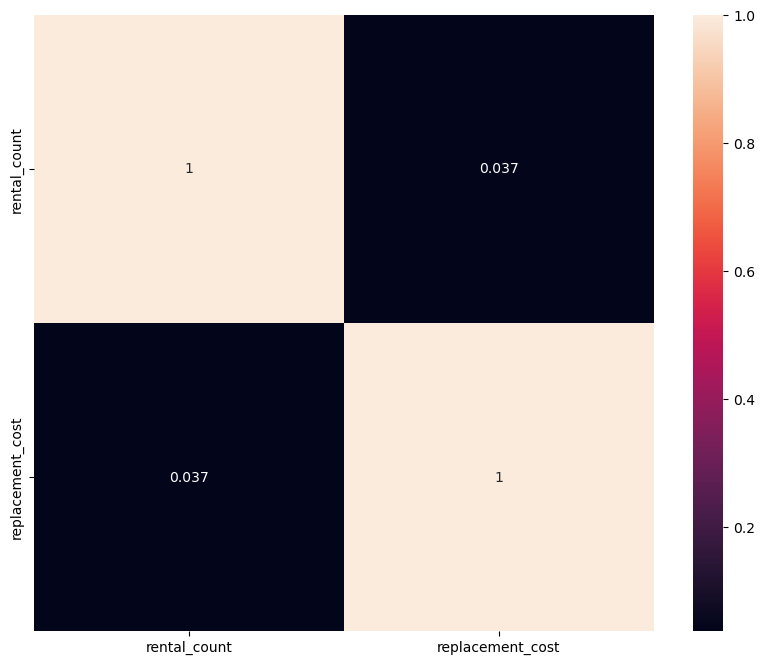

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix=X_num.corr()  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()
#low correlation I should keep them

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [14]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
X_train_num = X_train.select_dtypes(include = np.number).drop(['category_id','actor_id'],axis=1)
transformer = MinMaxScaler().fit(X_train_num) # need to keep transformer
X_train_normalized = transformer.transform(X_train_num)
X_train_norm = pd.DataFrame(X_train_normalized, columns=X_train_num.columns)
X_train_norm

,rental_count,replacement_cost
0,0.394265,0.35
1,0.397849,0.90
2,0.060932,0.45
3,0.172043,1.00
4,0.268817,0.65
...,...,...
761,0.053763,0.20
762,0.225806,0.40
763,0.075269,0.70
764,0.000000,0.45


In [15]:
X_train_categorical = X_train.select_dtypes(include = object)
X_train_categorical[['category_id','actor_id']] = X_train[['category_id','actor_id']]
print(X_train_categorical.nunique())
#X_train_cat = pd.get_dummies(X_train_categorical,columns=['type', 'operation', 'k_symbol', 'duration'], drop_first=True)
#X_train_cat.head()
X_train_categorical.shape

rating                5
special_features     15
category_id          16
actor_id            132
dtype: int64


(766, 4)

In [16]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown = 'ignore').fit(X_train_categorical)
cols = encoder.get_feature_names_out(input_features=X_train_categorical.columns)
X_train_cat_encode = pd.DataFrame(encoder.transform(X_train_categorical).toarray(),columns=cols)
X_train_cat_encode

,rating_G,rating_NC-17,rating_PG,rating_PG-13,rating_R,special_features_Behind the Scenes,special_features_Commentaries,"special_features_Commentaries,Behind the Scenes","special_features_Commentaries,Deleted Scenes","special_features_Commentaries,Deleted Scenes,Behind the Scenes",...,actor_id_152.0,actor_id_154.0,actor_id_155.0,actor_id_158.0,actor_id_159.0,actor_id_164.0,actor_id_166.0,actor_id_197.0,actor_id_198.0,actor_id_nan
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
762,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
763,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
764,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
# X concatenate the normalize data and the encoded data alias X_train_transformed
X_train_transformed = pd.concat([X_train_norm, X_train_cat_encode], axis=1)


In [18]:
# logistic regression model
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X_train_transformed, y_train)

C:\Users\benja\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
#transforming X_test as well
X_test_num = X_test.select_dtypes(include = np.number).drop(['category_id','actor_id'],axis=1)
X_test_normalized = transformer.transform(X_test_num)
X_test_norm = pd.DataFrame(X_test_normalized, columns=X_test_num.columns)
X_test_norm

,rental_count,replacement_cost
0,0.344086,0.15
1,0.401434,0.95
2,0.620072,0.65
3,0.713262,0.30
4,0.612903,0.40
...,...,...
187,0.394265,0.60
188,0.146953,0.35
189,0.903226,0.75
190,0.440860,0.65


In [20]:
X_test
X_test_categorical = X_test.select_dtypes(include = object)
X_test_categorical[['category_id','actor_id']] = X_test[['category_id','actor_id']]
X_test_categorical
cols2 = encoder.get_feature_names_out(input_features=X_test_categorical.columns)
X_test_cat_encode = pd.DataFrame(encoder.transform(X_test_categorical).toarray(),columns=cols2)
X_test_cat_encode

,rating_G,rating_NC-17,rating_PG,rating_PG-13,rating_R,special_features_Behind the Scenes,special_features_Commentaries,"special_features_Commentaries,Behind the Scenes","special_features_Commentaries,Deleted Scenes","special_features_Commentaries,Deleted Scenes,Behind the Scenes",...,actor_id_152.0,actor_id_154.0,actor_id_155.0,actor_id_158.0,actor_id_159.0,actor_id_164.0,actor_id_166.0,actor_id_197.0,actor_id_198.0,actor_id_nan
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
188,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
189,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
190,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
X_test_transformed = pd.concat([X_test_norm, X_test_cat_encode], axis=1)
#concatenation has to have the same order in the columns

In [34]:
predictions = classification.predict(X_test_transformed)
display(predictions)
print(len(predictions))
classification.score(X_test_transformed, y_test)

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

192


0.6979166666666666

In [32]:
LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_transformed, y_train)
LR.score(X_test_transformed, y_test)

C:\Users\benja\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7135416666666666

In [40]:
cm = confusion_matrix(y_test,predictions)
#I use test data and the predictions to check how good are those predictions

In [47]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

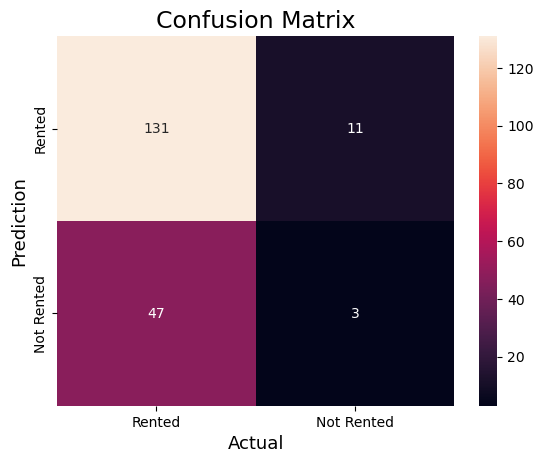

In [42]:
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['Rented','Not Rented'],
            yticklabels=['Rented','Not Rented'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

### Conclusions

Now i got is better to put the not ever rented (without rental_id) if they are in the shelfs as they can give us some clues on what people may dislike.
The model maybe should depend on less variables, I guess. I will like a fast method to check which variable is impacting the most the output.
I'm comfortable with this output fro the moment.


### Bonus

In [57]:
# I will try with the features that lead to the top rental_count movies. 
X.sort_values(by=['rental_count'], ascending=False).head(11)

,rental_count,replacement_cost,category_id,rating,special_features,actor_id
465,288,14.99,2,PG-13,"Trailers,Commentaries",33.0
854,276,18.99,2,R,"Trailers,Commentaries,Deleted Scenes,Behind th...",6.0
842,275,9.99,2,PG-13,"Trailers,Commentaries,Deleted Scenes,Behind th...",12.0
232,273,26.99,4,G,Commentaries,2.0
621,264,14.99,2,R,"Commentaries,Deleted Scenes,Behind the Scenes",23.0
284,261,24.99,11,R,Trailers,30.0
730,252,28.99,15,G,"Commentaries,Deleted Scenes",14.0
395,248,27.99,7,PG-13,Commentaries,14.0
348,248,22.99,14,PG,Deleted Scenes,2.0
426,240,29.99,3,NC-17,Trailers,38.0


In [60]:
list(X_test_transformed.columns)

['rental_count',
 'replacement_cost',
 'rating_G',
 'rating_NC-17',
 'rating_PG',
 'rating_PG-13',
 'rating_R',
 'special_features_Behind the Scenes',
 'special_features_Commentaries',
 'special_features_Commentaries,Behind the Scenes',
 'special_features_Commentaries,Deleted Scenes',
 'special_features_Commentaries,Deleted Scenes,Behind the Scenes',
 'special_features_Deleted Scenes',
 'special_features_Deleted Scenes,Behind the Scenes',
 'special_features_Trailers',
 'special_features_Trailers,Behind the Scenes',
 'special_features_Trailers,Commentaries',
 'special_features_Trailers,Commentaries,Behind the Scenes',
 'special_features_Trailers,Commentaries,Deleted Scenes',
 'special_features_Trailers,Commentaries,Deleted Scenes,Behind the Scenes',
 'special_features_Trailers,Deleted Scenes',
 'special_features_Trailers,Deleted Scenes,Behind the Scenes',
 'category_id_1',
 'category_id_2',
 'category_id_3',
 'category_id_4',
 'category_id_5',
 'category_id_6',
 'category_id_7',
 'categ

In [65]:
#this are my new choices
new_X_test_transformed = X_test_transformed[['rental_count','special_features_Trailers,Commentaries,Deleted Scenes,Behind the Scenes', 'rating_G', 'rating_R', 'rating_PG-13', 'category_id_2', 'category_id_4', 'category_id_11', 'category_id_15', 'actor_id_33.0', 'actor_id_6.0', 'actor_id_12.0', 'actor_id_2.0', 'actor_id_23.0', 'actor_id_28.0', 'actor_id_30.0', 'actor_id_14.0']]
new_X_train_transformed = X_train_transformed[['rental_count','special_features_Trailers,Commentaries,Deleted Scenes,Behind the Scenes', 'rating_G', 'rating_R', 'rating_PG-13', 'category_id_2', 'category_id_4', 'category_id_11', 'category_id_15', 'actor_id_33.0', 'actor_id_6.0', 'actor_id_12.0', 'actor_id_2.0', 'actor_id_23.0', 'actor_id_28.0', 'actor_id_30.0', 'actor_id_14.0']]

In [66]:
class2 = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(new_X_train_transformed, y_train)
pred2 = class2.predict(new_X_test_transformed)
display(pred2)
print(len(pred2))
class2.score(new_X_test_transformed, y_test)

C:\Users\benja\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

192


0.7395833333333334

In [67]:
LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(new_X_train_transformed, y_train)
LR.score(new_X_test_transformed, y_test)

C:\Users\benja\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7395833333333334